In [1]:
from huggingface_hub import login

login("")

pip uninstall torch torchvision torchaudio
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [2]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
import IPython.display as display

# Check if CUDA is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [3]:
model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

# Load model on GPU with bf16 precision
model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="cuda" if torch.cuda.is_available() else "auto",
).to(device)

processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

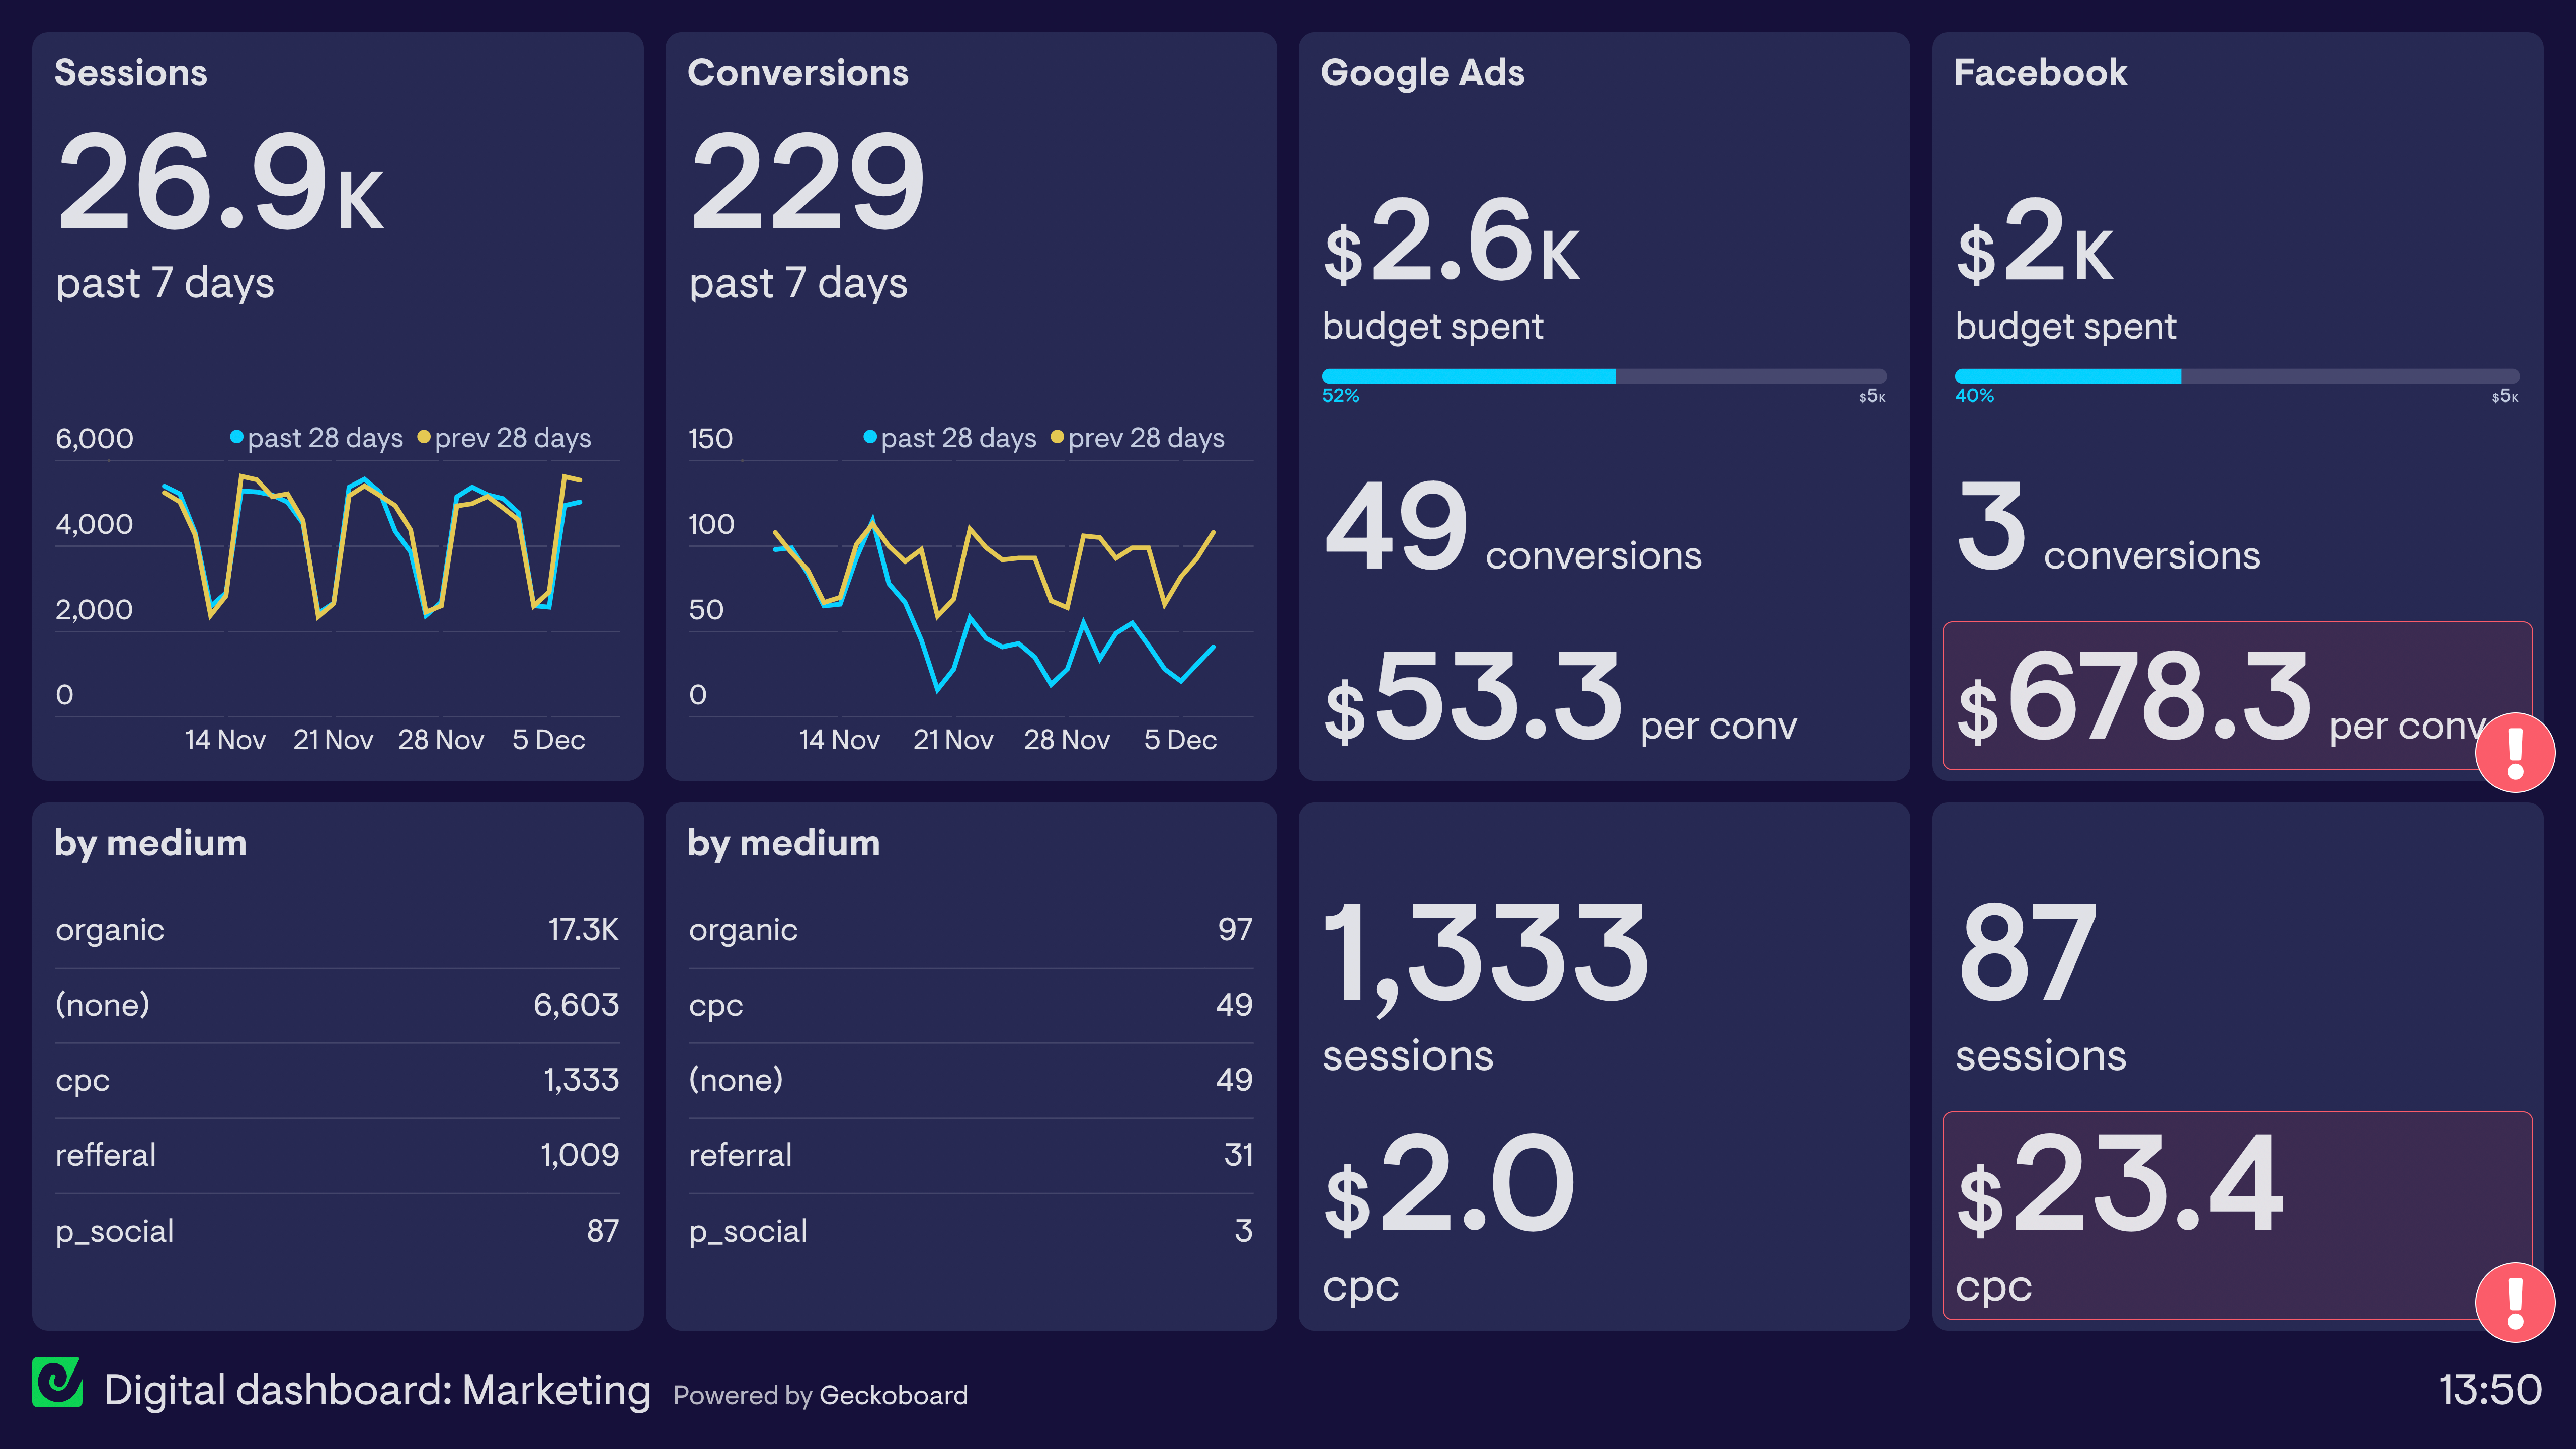

In [4]:
url = "https://www.geckoboard.com/uploads/Digital-dashboard-example.png"
image = Image.open(requests.get(url, stream=True).raw)
display.display(image)

In [5]:
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": "Describe the dashboard in the image like you are presenting it to the audience."}
    ]}
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)

# Move inputs to GPU
inputs = processor(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt"
).to(device)

In [6]:
%%time

# Generate output
output = model.generate(**inputs, max_new_tokens=64)

CPU times: total: 3min 52s
Wall time: 3min


In [7]:
# Decode and print result
print(processor.decode(output[0]))

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Describe the dashboard in the image like you are presenting it to the audience.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The image presents a digital dashboard for marketing, providing an overview of various metrics and statistics. The dashboard is divided into several sections, each displaying different types of data.

* **Sessions**
	+ Past 7 days: 26.9K
	+ Past 28 days: 6,000
* **
